In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
def gen_f1_plot(csv_names, model_names, title):
    if len(csv_names) != len(model_names):
        print('Number of CSV files don\'t match model names')
        return

    dfs = []
    for i in range(len(csv_names)):
        df = pd.read_csv(f'scores/{csv_names[i]}.csv')
        df.insert(0, 'Model', model_names[i], True)
        dfs.append(df)
    
    all_df = pd.concat(dfs, ignore_index = True, sort = False)
    all_df.groupby('Model')
    sns.set_style('whitegrid')

    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    g = sns.lineplot(ax = ax, x = 'Threshold', y = 'F1', hue = 'Model', marker = 'o', data = all_df)
    plt.legend(loc = 'best')
    ax.set(xlabel = 'IoU Threshold', ylabel = 'F1 Score')
    g.set_title(title)

## Pretrained StarDist vs Pretrained StarDist + 5/10 Additional Nuclei Images

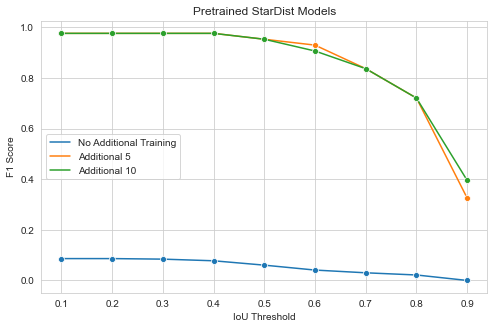

In [108]:
csv_names = ['pretrained_stardist', 'pretrained_add5', 'pretrained_add10']
model_names = ['No Additional Training', 'Additional 5', 'Additional 10']
gen_f1_plot(csv_names, model_names, 'Pretrained StarDist Models')